In [153]:
import scipy.io
import sounddevice as sd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [551]:
class audio_process:

    def __init__(self, audio_data, fs):
        self.audio_data = audio_data
        self.fs = fs


    def play_audio(self):
        ''' This function loads the .mat file, loads the audio data
            and plays the sound.'''
        sd.play(self.audio_data, self.fs)
        sd.wait()


    def compute_FFT_and_plot(self):
        '''This function performs FFT on the audio data and plots
            the magnitude vs frequcny'''
        fft_audio = np.fft.fft(self.audio_data)
        magnitude_spectrum = np.abs(fft_audio)
        magnitude_spectrum =  magnitude_spectrum.reshape(magnitude_spectrum.shape,)
        freq_bins = np.fft.fftfreq(len(self.audio_data), d=2 / self.fs)
        freq_bins = freq_bins.reshape(freq_bins.shape,)
        
        plt.figure(figsize=(5,5))
        plt.plot(abs(freq_bins.T), magnitude_spectrum)
        plt.xlabel("Frequency (Hz)")
        plt.ylabel("Magnitude")
        plt.title("Magnitude Spectrum")
        plt.grid(True)
        plt.show()
        return fft_audio


    def psd__(self):
        '''This function helps to plot the power spectral density of the audio signal'''

        plt.figure(figsize=(5,5))
        freqs, psd = signal.welch(self.audio_data)
        plt.semilogx(freqs, psd)
        plt.title('PSD: power spectral density')
        plt.xlabel('Frequency')
        plt.ylabel('Power')
        plt.tight_layout() 


    def spectogram(self):
        '''This function helps to plot the spectogram of the audio signal'''
        _, _, spectrogram = signal.spectrogram(self.audio_data, self. fs)
        plt.figure(figsize=(5, 5))
        plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
        plt.title('Spectrogram')
        plt.ylabel('Frequency band')
        plt.xlabel('Time window')
        plt.tight_layout() 


In [555]:
"""This code opens the audio present in r2112.mat and load its useful data:
    audio_data and the sampling frequency (fs)"""

filename = 'r2112.mat'
mat = scipy.io.loadmat(filename)
audio_data = mat["rush"].reshape(mat["rush"].shape,)[:,0]
fs = mat['FS'][0]

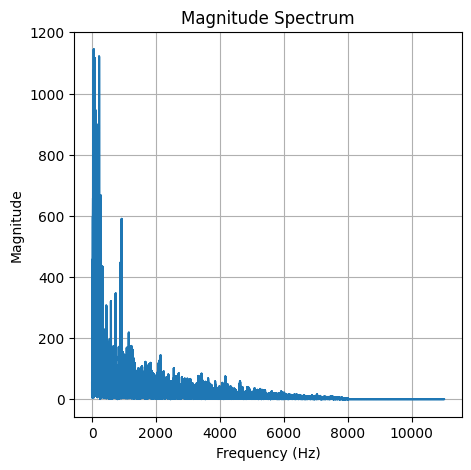

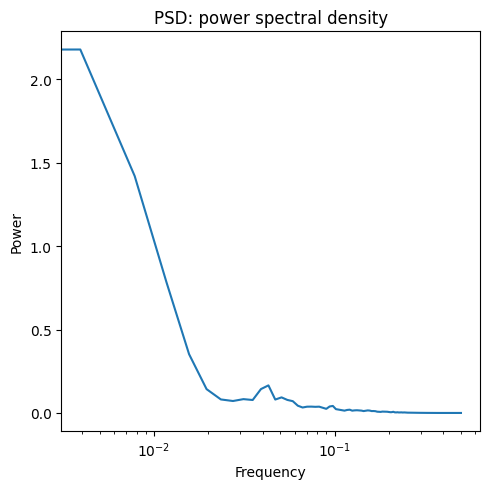

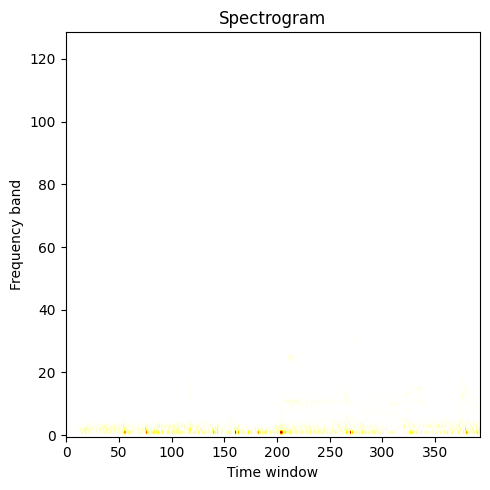

In [556]:
"""Using the audio from r2112.mat, we plot the FFT, PSD and spectogram,
    and play the audio."""

audio = audio_process(audio_data, fs)
audio.play_audio()
audio.compute_FFT_and_plot()
audio.psd__()
audio.spectogram()

In [557]:
"""Opening noisy audio file r2112noisy.mat"""
filename = 'r2112noisy.mat'
mat = scipy.io.loadmat(filename)
audio_data_noisy = mat["rushnoisy"].reshape(mat["rushnoisy"].shape,)[:,0]
fs_noisy = mat['FS'][0]

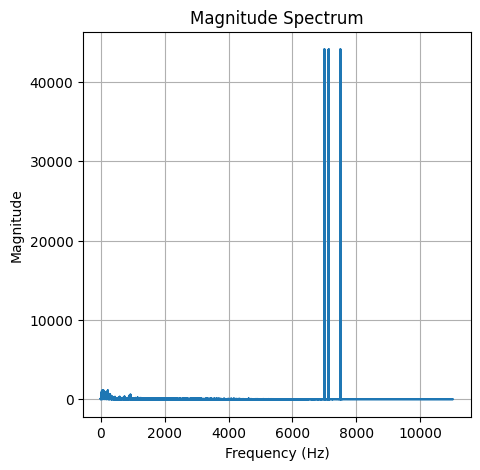

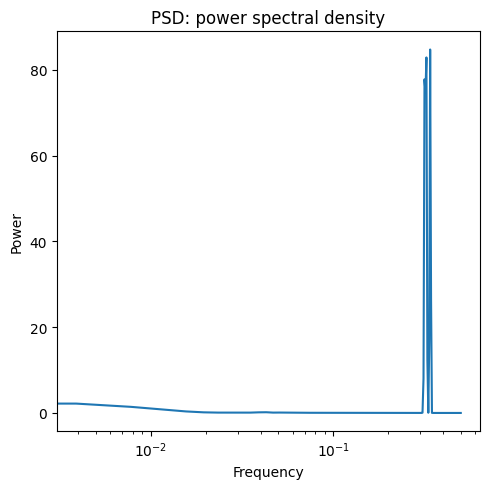

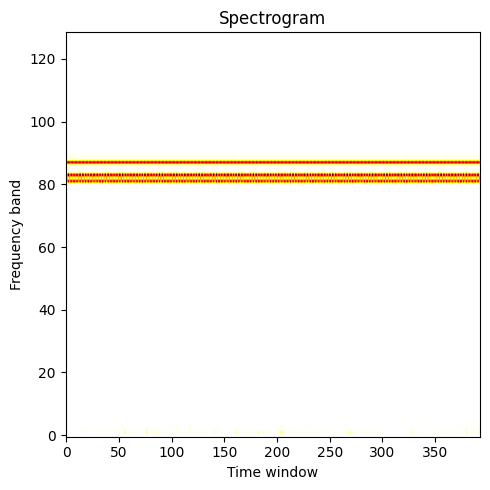

In [559]:
noisy_audio = audio_process(audio_data_noisy, fs_noisy)
noisy_audio.play_audio()
noisy_fft_data = noisy_audio.compute_FFT_and_plot()
noisy_audio.psd__()
noisy_audio.spectogram()

In [560]:
# Making firt quater fft coefficients zero
truncation_idx = int((3 * len(noisy_fft_data)) / 4)
truncation_idx
noisy_fft_data[:truncation_idx] = 0

In [561]:
cleaned_fft_data = noisy_fft_data
clean_audio_data_reconstructed = np.fft.ifft(cleaned_fft_data)
clean_audio_data_reconstructed = 2 * clean_audio_data_reconstructed.real

In [562]:
clean_audio = audio_process(clean_audio_data_reconstructed, fs_noisy)

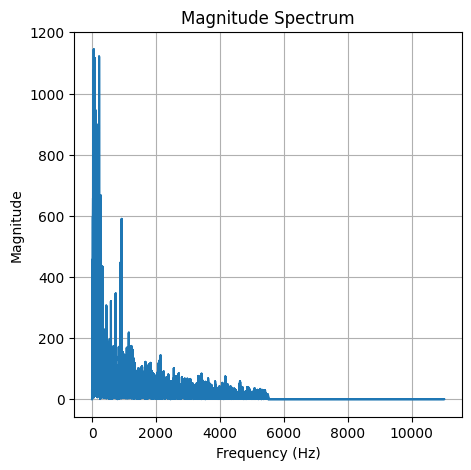

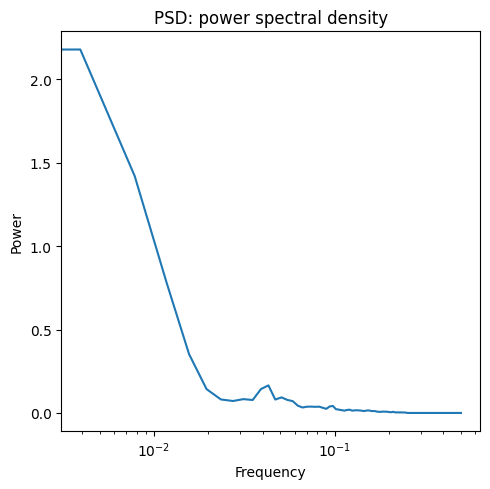

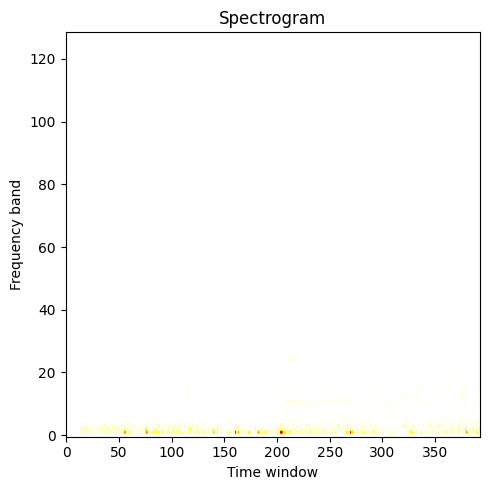

In [563]:
clean_audio.play_audio()
clean_audio.compute_FFT_and_plot()
clean_audio.psd__()
clean_audio.spectogram()